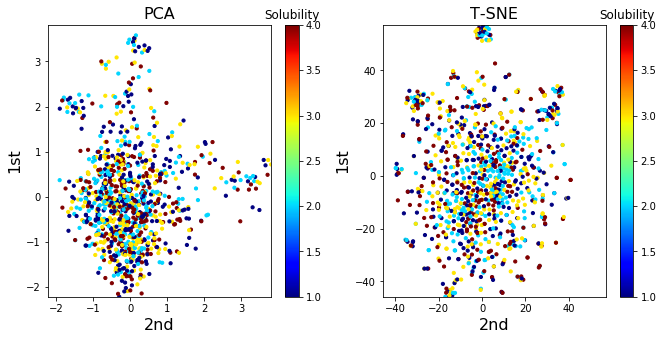

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
import random

x= np.loadtxt("rt_datasets_ecfp4_descriptors_x.csv",delimiter=',', dtype='int8')[0:1000,:]
x_input = x[:,1:]

#Generate label paramters
y_label = [random.randint(1,4) for _ in range(1000)]

#Caculate PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x_input)
pca_values = pd.DataFrame(x)
pca_values.columns = ["PCA1", "PCA2"]

#Caculate T-SNE
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(x_input)
tsne_values = pd.DataFrame(tx)
tsne_values.columns = ["PCA1", "PCA2"]

import matplotlib.pyplot as plt
%matplotlib inline

def plot_pca_tsne(pca_1, pca_2,tsne_1, tsne_2, y_label):
    
    def _plot_pca_tsne(value_1, value_2, title):
        lim = (min(value_1.min(), value_2.min()),
               max(value_1.max(), value_2.max()))
        plt.scatter(value_2, value_1, s=10, c=y_label, cmap=plt.get_cmap('jet'))
        #plt.plot(lim, lim, c='red', alpha=0.5)
        plt.xlim(lim)
        plt.ylim(lim)
        plt.xlabel('2nd', fontsize=16)
        plt.ylabel('1st', fontsize=16)
        plt.title(title, fontsize=16)
        cbar = plt.colorbar()
        cbar.ax.set_title('Solubility')#ax.set_ylabel('Solubility', rotation=270)
        
    plt.figure(figsize=(11, 5))
    plt.subplot(1, 2, 1)
    _plot_pca_tsne(pca_1, pca_2, "PCA")
    plt.subplot(1, 2, 2)
    _plot_pca_tsne(tsne_1, tsne_2, "T-SNE")

plot_pca_tsne(pca_values.iloc[:,0],pca_values.iloc[:,1], tsne_values.iloc[:,0],tsne_values.iloc[:,1], y_label)

#Work on generating inteactive plots of chemical space and color the project name. 